In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import os
import glob as gb
import cv2
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.applications import VGG16
from tensorflow.keras.optimizers import Adam

#Loading the data from kaggle

In [2]:
! kaggle datasets download -d andrewmvd/animal-faces

Dataset URL: https://www.kaggle.com/datasets/andrewmvd/animal-faces
License(s): Attribution-NonCommercial 4.0 International (CC BY-NC 4.0)
100% 694M/696M [00:45<00:00, 23.0MB/s]
100% 696M/696M [00:45<00:00, 15.9MB/s]


In [3]:
!unzip animal-faces.zip

Streaming output truncated to the last 5000 lines.
  inflating: afhq/train/wild/flickr_wild_001378.jpg  
  inflating: afhq/train/wild/flickr_wild_001379.jpg  
  inflating: afhq/train/wild/flickr_wild_001380.jpg  
  inflating: afhq/train/wild/flickr_wild_001381.jpg  
  inflating: afhq/train/wild/flickr_wild_001382.jpg  
  inflating: afhq/train/wild/flickr_wild_001384.jpg  
  inflating: afhq/train/wild/flickr_wild_001385.jpg  
  inflating: afhq/train/wild/flickr_wild_001386.jpg  
  inflating: afhq/train/wild/flickr_wild_001387.jpg  
  inflating: afhq/train/wild/flickr_wild_001388.jpg  
  inflating: afhq/train/wild/flickr_wild_001389.jpg  
  inflating: afhq/train/wild/flickr_wild_001390.jpg  
  inflating: afhq/train/wild/flickr_wild_001391.jpg  
  inflating: afhq/train/wild/flickr_wild_001392.jpg  
  inflating: afhq/train/wild/flickr_wild_001393.jpg  
  inflating: afhq/train/wild/flickr_wild_001394.jpg  
  inflating: afhq/train/wild/flickr_wild_001395.jpg  
  inflating: afhq/train/wild/fl

#Showing sample images

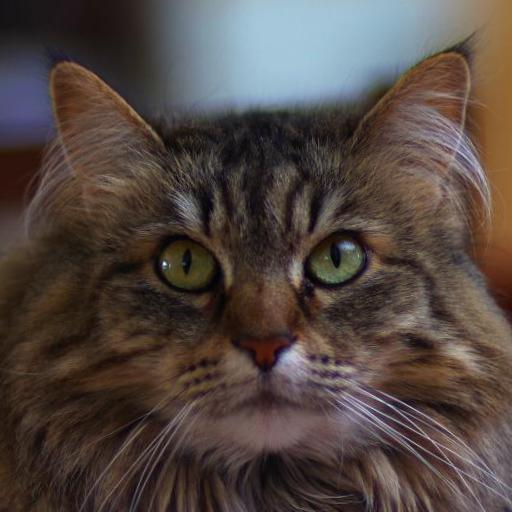

In [5]:
tf.keras.preprocessing.image.load_img('/content/afhq/train/cat/flickr_cat_000017.jpg')

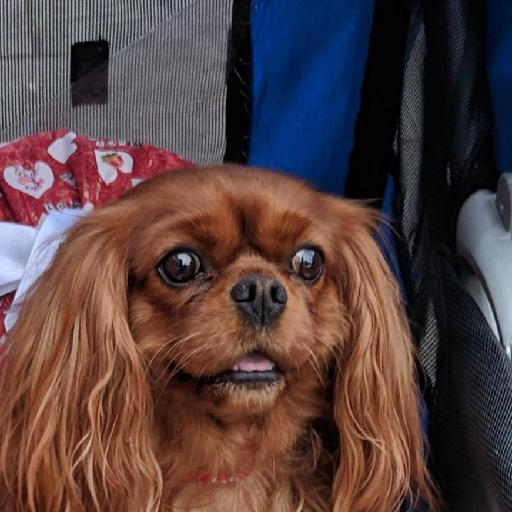

In [6]:
tf.keras.preprocessing.image.load_img('/content/afhq/train/dog/flickr_dog_000004.jpg')

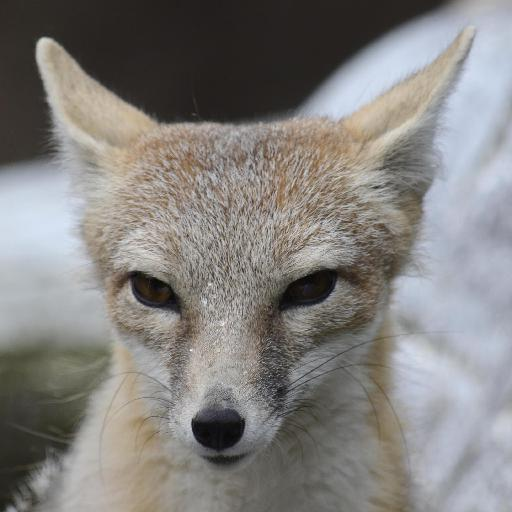

In [7]:
tf.keras.preprocessing.image.load_img('/content/afhq/train/wild/flickr_wild_000005.jpg')

#Applying generator

In [7]:
training_generator = ImageDataGenerator(rescale=1./255,
                                        rotation_range=7,
                                        horizontal_flip=True,
                                        zoom_range=0.2)
training_dataset = training_generator.flow_from_directory('/content/afhq/train',
                                                        target_size = (64, 64),
                                                        batch_size = 32,
                                                        class_mode = 'categorical',
                                                        shuffle = True)

Found 14630 images belonging to 3 classes.


In [8]:
test_generator = ImageDataGenerator(rescale=1./255)
test_dataset = test_generator.flow_from_directory('/content/afhq/val',
                                                     target_size = (64, 64),
                                                     batch_size = 1,
                                                     class_mode = 'categorical',
                                                     shuffle = False)

Found 1500 images belonging to 3 classes.


#Modeling

In [9]:
network = Sequential()
network.add(Conv2D(32, (3,3), input_shape = (64,64,3), activation='relu'))
network.add(MaxPooling2D(pool_size=(2,2)))

network.add(Conv2D(32, (3,3), activation='relu'))
network.add(MaxPooling2D(pool_size=(2,2)))

network.add(Flatten())

network.add(Dense(units = 7317, activation='relu'))
network.add(Dense(units = 7317, activation='relu'))
network.add(Dense(units = 3, activation='softmax'))

In [10]:
network.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 31, 31, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense (Dense)               (None, 7317)              4

In [11]:
network.compile(optimizer='Adam', loss='categorical_crossentropy', metrics = ['accuracy'])

In [12]:
history = network.fit(training_dataset, epochs=20)

Epoch 1/20
458/458 [==============================] - 57s 113ms/step - loss: 0.5179 - accuracy: 0.8037
Epoch 2/20
458/458 [==============================] - 50s 110ms/step - loss: 0.2516 - accuracy: 0.9071
Epoch 3/20
458/458 [==============================] - 50s 110ms/step - loss: 0.1945 - accuracy: 0.9267
Epoch 4/20
458/458 [==============================] - 50s 109ms/step - loss: 0.1714 - accuracy: 0.9377
Epoch 5/20
458/458 [==============================] - 51s 111ms/step - loss: 0.1460 - accuracy: 0.9448
Epoch 6/20
458/458 [==============================] - 50s 110ms/step - loss: 0.1323 - accuracy: 0.9506
Epoch 7/20
458/458 [==============================] - 49s 107ms/step - loss: 0.1186 - accuracy: 0.9573
Epoch 8/20
458/458 [==============================] - 51s 112ms/step - loss: 0.1021 - accuracy: 0.9633
Epoch 9/20
458/458 [==============================] - 52s 113ms/step - loss: 0.0966 - accuracy: 0.9664
Epoch 10/20
458/458 [==============================] - 52s 113ms/step - l

In [13]:
forecasts = network.predict(test_dataset)
forecasts

1500/1500 [==============================] - 7s 4ms/step


array([[1.0000000e+00, 4.4590210e-17, 3.8281214e-20],
       [1.0000000e+00, 2.1104217e-10, 1.0883041e-09],
       [9.9999869e-01, 1.3500219e-06, 3.1371528e-10],
       ...,
       [2.6723177e-08, 6.4952863e-11, 1.0000000e+00],
       [5.1757604e-29, 5.7387738e-23, 1.0000000e+00],
       [2.3495186e-10, 3.8968819e-06, 9.9999607e-01]], dtype=float32)

In [14]:
forecasts = np.argmax(forecasts, axis = 1)
forecasts

array([0, 0, 0, ..., 2, 2, 2])

In [15]:
accuracy_score(test_dataset.classes, forecasts)

0.97

In [16]:
cm = confusion_matrix(test_dataset.classes, forecasts)
cm

array([[484,   4,  12],
       [  7, 477,  16],
       [  2,   4, 494]])

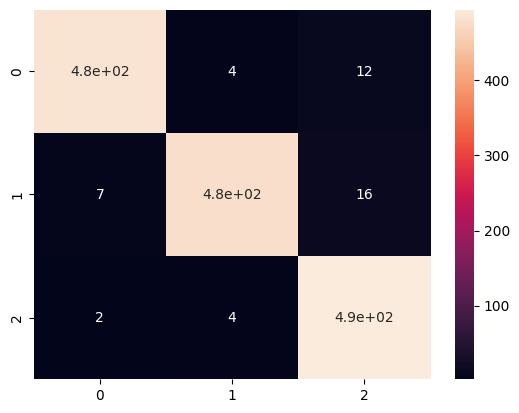

In [17]:
sns.heatmap(cm, annot=True);

In [18]:
print(classification_report(test_dataset.classes, forecasts))

              precision    recall  f1-score   support

           0       0.98      0.97      0.97       500
           1       0.98      0.95      0.97       500
           2       0.95      0.99      0.97       500

    accuracy                           0.97      1500
   macro avg       0.97      0.97      0.97      1500
weighted avg       0.97      0.97      0.97      1500

